<a href="https://colab.research.google.com/github/raushan0422/NextWordPredictionML/blob/main/Raushan's_lstm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

with open("/content/Data_for_model.txt",'r',encoding="utf-8") as myfile:
    mytext=myfile.read()


In [3]:
mytokenizer = Tokenizer()
mytokenizer.fit_on_texts([mytext])
total_words = len(mytokenizer.word_index) + 1

In [4]:
mytokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'a': 5,
 'i': 6,
 '”': 7,
 'in': 8,
 'that': 9,
 'it': 10,
 'he': 11,
 'was': 12,
 'you': 13,
 'his': 14,
 'is': 15,
 'my': 16,
 'have': 17,
 'with': 18,
 'as': 19,
 'had': 20,
 'at': 21,
 'which': 22,
 'for': 23,
 'be': 24,
 'not': 25,
 'me': 26,
 'but': 27,
 'from': 28,
 'we': 29,
 'this': 30,
 'said': 31,
 'upon': 32,
 'there': 33,
 'holmes': 34,
 'him': 35,
 'so': 36,
 'her': 37,
 'she': 38,
 'all': 39,
 '’': 40,
 'been': 41,
 'your': 42,
 'on': 43,
 'very': 44,
 'by': 45,
 'one': 46,
 'are': 47,
 '“i': 48,
 'were': 49,
 'an': 50,
 'no': 51,
 'would': 52,
 'out': 53,
 'what': 54,
 'then': 55,
 'up': 56,
 'when': 57,
 'man': 58,
 'could': 59,
 'has': 60,
 'do': 61,
 'into': 62,
 'or': 63,
 'little': 64,
 'will': 65,
 'who': 66,
 'mr': 67,
 'if': 68,
 'some': 69,
 'down': 70,
 'see': 71,
 'now': 72,
 'our': 73,
 'should': 74,
 'may': 75,
 'am': 76,
 'us': 77,
 'over': 78,
 'they': 79,
 'can': 80,
 'more': 81,
 'think': 82,
 'about': 83,
 'mu

In [5]:
my_input_sequences = []

for line in mytext.split('\n'):
    #print(line)
    token_list = mytokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        print(my_n_gram_sequence)
        my_input_sequences.append(my_n_gram_sequence)
#print(input_sequences)

Streaming output truncated to the last 5000 lines.
[27, 16, 1254, 12, 572, 19]
[27, 16, 1254, 12, 572, 19, 339]
[27, 16, 1254, 12, 572, 19, 339, 19]
[27, 16, 1254, 12, 572, 19, 339, 19, 16]
[27, 16, 1254, 12, 572, 19, 339, 19, 16, 2202]
[27, 16, 1254, 12, 572, 19, 339, 19, 16, 2202, 16]
[27, 16, 1254, 12, 572, 19, 339, 19, 16, 2202, 16, 227]
[27, 16, 1254, 12, 572, 19, 339, 19, 16, 2202, 16, 227, 12]
[27, 16, 1254, 12, 572, 19, 339, 19, 16, 2202, 16, 227, 12, 316]
[121, 56]
[121, 56, 6]
[121, 56, 6, 52]
[121, 56, 6, 52, 840]
[121, 56, 6, 52, 840, 13]
[121, 56, 6, 52, 840, 13, 5]
[121, 56, 6, 52, 840, 13, 5, 2339]
[121, 56, 6, 52, 840, 13, 5, 2339, 6]
[121, 56, 6, 52, 840, 13, 5, 2339, 6, 201]
[121, 56, 6, 52, 840, 13, 5, 2339, 6, 201, 43]
[121, 56, 6, 52, 840, 13, 5, 2339, 6, 201, 43, 16]
[121, 56, 6, 52, 840, 13, 5, 2339, 6, 201, 43, 16, 263]
[121, 56, 6, 52, 840, 13, 5, 2339, 6, 201, 43, 16, 263, 2]
[121, 56, 6, 52, 840, 13, 5, 2339, 6, 201, 43, 16, 263, 2, 1356]
[121, 56, 6, 52, 840

In [6]:
max_sequence_len = max([len(x) for x in my_input_sequences])
input_sequences = np.array(pad_sequences(my_input_sequences, maxlen=max_sequence_len, padding='pre'))
print(max_sequence_len)

20


In [7]:
input_sequences


array([[   0,    0,    0, ...,    0,  145, 4790],
       [   0,    0,    0, ...,  145, 4790,    1],
       [   0,    0,    0, ..., 4790,    1, 1020],
       ...,
       [   0,    0,    0, ...,    3,  360,   83],
       [   0,    0,    0, ...,  360,   83,  358],
       [   0,    0,    0, ...,   83,  358, 1673]], dtype=int32)

In [8]:
x = input_sequences[:,:-1]
y = input_sequences[:,-1]


In [9]:
x


array([[   0,    0,    0, ...,    0,    0,  145],
       [   0,    0,    0, ...,    0,  145, 4790],
       [   0,    0,    0, ...,  145, 4790,    1],
       ...,
       [   0,    0,    0, ..., 8931,    3,  360],
       [   0,    0,    0, ...,    3,  360,   83],
       [   0,    0,    0, ...,  360,   83,  358]], dtype=int32)

In [10]:
y


array([4790,    1, 1020, ...,   83,  358, 1673], dtype=int32)

In [11]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [12]:
y[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [13]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 100)           893200    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 8932)              1348732   
                                                                 
Total params: 2392532 (9.13 MB)
Trainable params: 2392532 (9.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x,y, epochs=100, verbose=1)

Epoch 1/100
3176/3176 [==============================] - 233s 73ms/step - loss: 6.2717 - accuracy: 0.0754
Epoch 2/100
3176/3176 [==============================] - 228s 72ms/step - loss: 5.5034 - accuracy: 0.1274
Epoch 3/100
3176/3176 [==============================] - 233s 73ms/step - loss: 5.0936 - accuracy: 0.1530
Epoch 4/100
3176/3176 [==============================] - 227s 71ms/step - loss: 4.7456 - accuracy: 0.1736
Epoch 5/100
3176/3176 [==============================] - 223s 70ms/step - loss: 4.4275 - accuracy: 0.1932
Epoch 6/100
3176/3176 [==============================] - 222s 70ms/step - loss: 4.1272 - accuracy: 0.2137
Epoch 7/100
3176/3176 [==============================] - 223s 70ms/step - loss: 3.8461 - accuracy: 0.2416
Epoch 8/100
3176/3176 [==============================] - 221s 70ms/step - loss: 3.5793 - accuracy: 0.2744
Epoch 9/100
3176/3176 [==============================] - 221s 70ms/step - loss: 3.3311 - accuracy: 0.3088
Epoch 10/100
3176/3176 [======================

In [21]:
input_text = input("Enter your word: ")
predict_next_words= int(input("Enter the no. of prediction: "))
for i in range(predict_next_words):
    token_list = mytokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word =""

    for word, index in mytokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    input_text += " " + output_word
print("The prediction is:",input_text)

Enter your word: start 
Enter the no. of prediction: 5
[722]
1/1 [==============================] - 0s 25ms/step
[722, 4]
1/1 [==============================] - 0s 25ms/step
[722, 4, 30]
1/1 [==============================] - 0s 24ms/step
[722, 4, 30, 145]
1/1 [==============================] - 0s 25ms/step
[722, 4, 30, 145, 130]
1/1 [==============================] - 0s 25ms/step
The prediction is: start  of this project gutenberg ebook


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

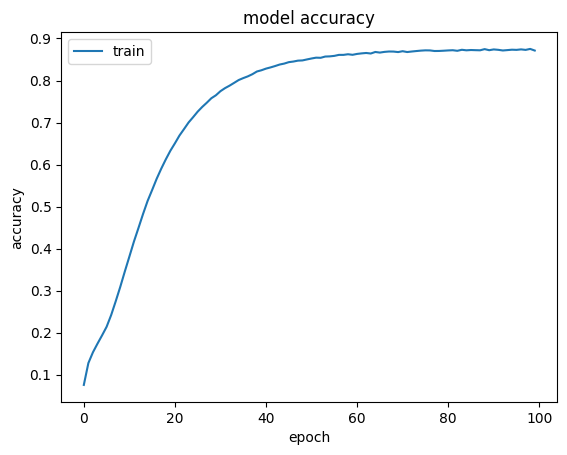

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

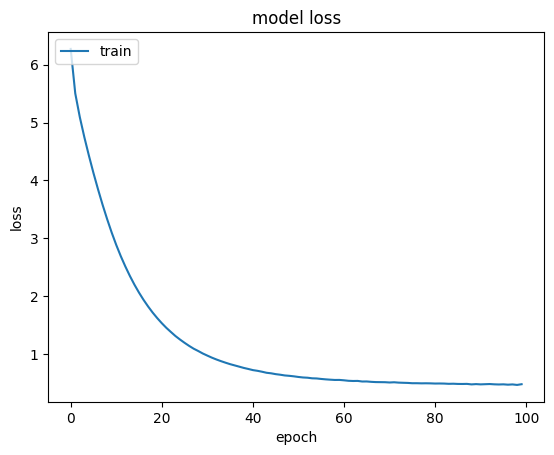

In [24]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()